# HW 11 - Assignment 2
#### Author: Daniel Fay
-----------
#### Tasks:
1) get and prep your data

2) cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)

3) plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).

4) Use another clustering algorithm (of your choice)

5) overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters

6) Compare the results of the 2 algorithms

7) attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 

### Import Libraries
--------------

In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import zipfile
import seaborn
import os
%matplotlib inline

print (os.getenv("PUIDATA"))

/home/cusp/pf910/PUIdata


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Task 1
--------------
* Download census business data
* Load all files into one dataframe
* Transform dataframe to include zip, year and establishments

In [2]:
# Download Years 94-99
#for i in range(93,100):
    #os.system('curl -o ' + os.getenv('PUIDATA') + '/zbp' + str(i) + 'totals.zip' + \
              #' ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp' + str(i) + 'totals.zip')

In [3]:
# Download Years 00-01
#for i in range(2):
    #os.system('curl -o ' + os.getenv('PUIDATA') + '/zbp0' + str(i) + 'totals.zip' + \
              #' ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0' + str(i) + 'totals.zip')

In [4]:
# Download Years 02-09
#for i in range(2,10):
    #os.system('curl -o ' + os.getenv('PUIDATA') + '/zbp0' + str(i) + 'totals.zip' + \
              #' ftp://ftp.census.gov/econ200' + str(i) + '/CBP_CSV/zbp0' + str(i) + 'totals.zip')

In [5]:
# Download Years 10-14
#for i in range(10,16):
    #os.system('curl -o ' + os.getenv('PUIDATA') + '/zbp' + str(i) + 'totals.zip' + \
              #' ftp://ftp.census.gov/econ20' + str(i) + '/CBP_CSV/zbp' + str(i) + 'totals.zip')

In [11]:
nyc_zips = [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10016, \
                  10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, \
                  10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10044 ,10048, 10065, 10069, \
                  10075, 10111, 10115, 10128, 10280, 10281, 10282, 10451, 10452, 10453, 10454, 10455, 10456, 10457, \
                  10458, 10459, 10460, 10461, 10462, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, \
                  10474, 10475, 11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, \
                  11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, \
                  11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11251, 11001, 11004, \
                  11005, 11040, 11096, 11101, 11102, 11103, 11104, 11105, 11106, 11109, 11354, 11355, 11356, 11357, \
                  11358, 11359, 11360, 11361, 11362, 11363, 11364, 11365, 11366, 11367, 11368, 11369, 11371, 11372, \
                  11373, 11374, 11375, 11377, 11378, 11379, 11385, 11411, 11412, 11413, 11414, 11415, 11416, 11417, \
                  11418, 11419, 11420, 11421, 11422, 11423, 11426, 11427, 11428, 11429, 11430, 11432, 11433, 11434, \
                  11435, 11436, 11451, 11691, 11692, 11694, 11697, 10301, 10302, 10303, 10304, 10305, 10306, 10307, \
                  10308, 10309, 10310, 10312, 10314]

In [12]:
# Load years 1994 - 1999 into dataframe
cb_data = pd.DataFrame()
for i in range (94,100):
    filename = 'zbp' + str(i) + 'totals.zip'
    zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + filename)
    df = pd.read_csv(zf.open(filename.replace('.zip','.txt')))
    df.columns = [x.lower() for x in df.columns]
    df['year'] = i + 1900
    df  = df[df['zip'].isin(nyc_zips)]
    df = df[['zip', 'est', 'year']]
    cb_data = cb_data.append(df)

In [13]:
# Load years 2000 - 2009 into dataframe
for i in range (0,10):
    filename = 'zbp0' + str(i) + 'totals.zip'
    zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + filename)
    df = pd.read_csv(zf.open(filename.replace('.zip','.txt')))
    df.columns = [x.lower() for x in df.columns]
    df['year'] = i + 2000
    df  = df[df['zip'].isin(nyc_zips)]
    df = df[['zip', 'est', 'year']]
    cb_data = cb_data.append(df)

In [14]:
# Load years 2010 - 2014 into dataframe
for i in range (10,15):
    filename = 'zbp' + str(i) + 'totals.zip'
    zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + filename)
    df = pd.read_csv(zf.open(filename.replace('.zip','.txt')))
    df.columns = [x.lower() for x in df.columns]
    df['year'] = i + 2000
    df  = df[df['zip'].isin(nyc_zips)]
    df = df[['zip', 'est', 'year']]
    cb_data = cb_data.append(df)
cb_data.reset_index(inplace=True)
cb_data.drop('index', axis=1, inplace=True)
cb_data.head()

,zip,est,year
0,10001,6999,1994
1,10002,1784,1994
2,10003,3256,1994
3,10004,1115,1994
4,10005,1076,1994


In [15]:
cb_data['zip'].shape

(3883,)

In [16]:
# Transform Dataframe to have zip as index, year as column title and establishments as values
cb_data_pivot = cb_data.pivot(index='zip', columns='year', values='est')
cb_data_pivot.dropna(inplace=True)
cb_data_pivot.head()

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,7084.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,2402.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,3704.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1287.0,1249.0,1244.0,1200.0,...,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,1321.0


In [17]:
# Standardize Time Series
cb_data_stan = (cb_data_pivot - cb_data_pivot.mean()) / (cb_data_pivot.std())
cb_data_stan.head()

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
10001,4.782160,4.719856,4.695557,4.643200,4.669511,4.657093,4.621810,4.509593,4.635345,4.589322,...,4.645606,4.689439,4.857723,4.813668,4.755548,4.701198,4.668614,4.620519,4.596888,4.625197
10002,0.640494,0.637119,0.703506,0.768153,0.716121,0.774493,0.891181,1.081098,0.901668,0.994952,...,1.161612,1.153250,1.167437,1.171428,1.250953,1.314127,1.330758,1.336199,1.334456,1.299646
10003,1.809531,1.844351,1.863338,1.896129,1.955367,1.961597,1.931908,1.862751,1.933947,1.994497,...,2.053304,2.067769,2.202295,2.222734,2.275254,2.276213,2.295371,2.302852,2.315850,2.329002
10004,0.109185,0.098591,0.094942,0.103208,0.093486,0.131918,0.163561,0.124515,0.123053,0.112097,...,0.091583,0.125071,0.169755,0.169641,0.170949,0.171408,0.164248,0.176215,0.185562,0.227181
10005,0.078212,0.086968,0.159205,0.144198,0.164258,0.138705,0.158379,0.125992,0.116156,0.072176,...,0.056968,0.086187,0.096161,0.104886,0.089717,0.069074,0.084573,0.046561,0.046233,0.050958


### Task 2
--------------
* Determine optimal k for clustering
* Cluster using K-means

In [18]:
# Define eblow function (function defined as part of the ADS class)


def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

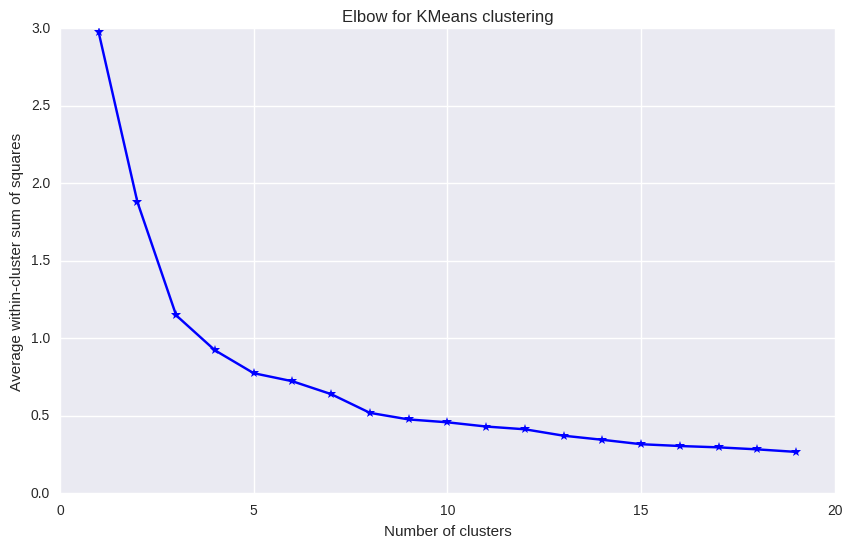

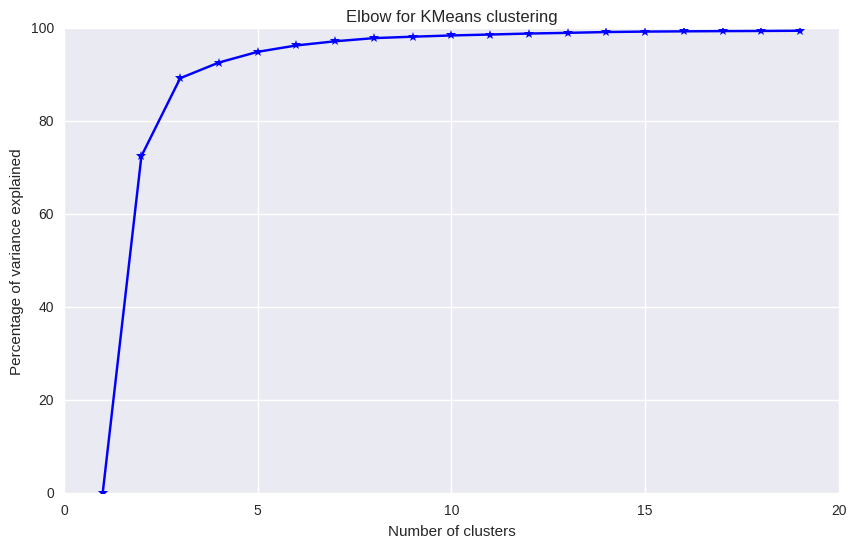

In [19]:
# Run elbow function on census business data
elbow(cb_data_stan, range(1, 20))

#### Figure 1 & 2:
Figure 1 and 2 illustrate both the average within cluster sum of squares and variance explained for k number of clusters ranging 1 to 20. I would argue that a good number of clusters would be 3. This is based on visual inspection of the two plots looking for the point where the decrease in cluster sum of squares or increase the variance explained does not change much by increasing clusters. 

In [20]:
# Cluster data using K-means and add labels to census business data
n = 3
km = KMeans(random_state=234,n_clusters=n)
results = km.fit(cb_data_stan)
cb_data_stan['km_label'] = results.labels_
cb_data_stan.head()

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,km_label
zip,,,,,,,,,,,,,,,,,,,,,
10001,4.782160,4.719856,4.695557,4.643200,4.669511,4.657093,4.621810,4.509593,4.635345,4.589322,...,4.689439,4.857723,4.813668,4.755548,4.701198,4.668614,4.620519,4.596888,4.625197,1
10002,0.640494,0.637119,0.703506,0.768153,0.716121,0.774493,0.891181,1.081098,0.901668,0.994952,...,1.153250,1.167437,1.171428,1.250953,1.314127,1.330758,1.336199,1.334456,1.299646,2
10003,1.809531,1.844351,1.863338,1.896129,1.955367,1.961597,1.931908,1.862751,1.933947,1.994497,...,2.067769,2.202295,2.222734,2.275254,2.276213,2.295371,2.302852,2.315850,2.329002,2
10004,0.109185,0.098591,0.094942,0.103208,0.093486,0.131918,0.163561,0.124515,0.123053,0.112097,...,0.125071,0.169755,0.169641,0.170949,0.171408,0.164248,0.176215,0.185562,0.227181,2
10005,0.078212,0.086968,0.159205,0.144198,0.164258,0.138705,0.158379,0.125992,0.116156,0.072176,...,0.086187,0.096161,0.104886,0.089717,0.069074,0.084573,0.046561,0.046233,0.050958,0


### Task 3
--------------
* Plot cluster centers overlayed on each time series

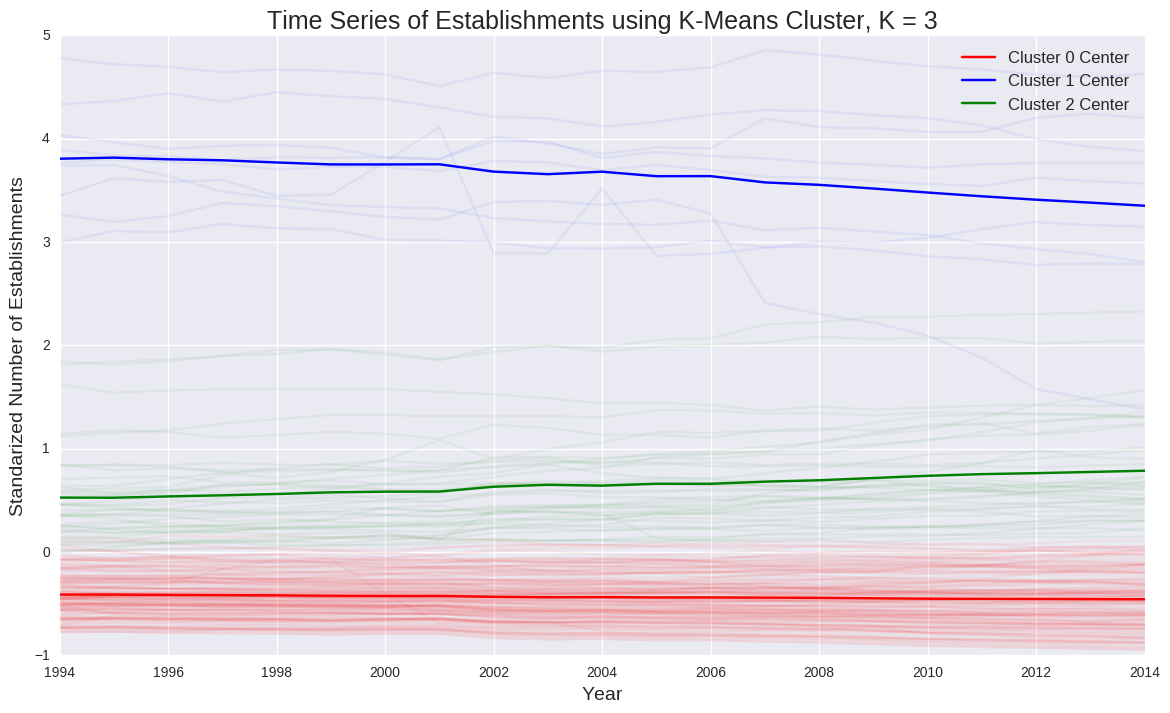

In [21]:
# Cluster Visualization
fig = plt.figure(1, figsize=(14, 8))
colors = ['red', 'blue', 'green']
val = [int(j) for j in cb_data_stan.columns[0:-1]]

for i in range(len(cb_data_stan)):
    plt.plot(val, cb_data_stan.iloc[i,:-1], c=colors[cb_data_stan.km_label.iloc[i]], alpha=0.05, label='_zipcode time series')  


plt.plot(val, km.cluster_centers_[0], c=colors[0], label='Cluster 0 Center')
plt.plot(val, km.cluster_centers_[1], c=colors[1], label='Cluster 1 Center')
plt.plot(val, km.cluster_centers_[2], c=colors[2], label='Cluster 2 Center')

plt.ylabel('Standarized Number of Establishments', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks((np.arange(1994,2015,2)))
plt.xlim(1994,2014)
plt.title("Time Series of Establishments using K-Means Cluster, K = {}".format(n), fontsize=18)
plt.legend(fontsize=12)

#### Figure 3:
Figure 3 illustrates the time series cluster center for each of the 3 clusters. Each time series represents a zip code in New York. The plot shows three seperate clusters of zip codes based on the number of establishments. The darker lines for each color show the cluster center. Cluster 1 is approximately 3 standard deviations from the mean for each year which would indicate zip codes with large retail districts.

### Task 4
--------------
* Cluster Data using Agglomerative Clustering
* Plot cluster centers overlayed on each time series

In [22]:
# Cluster data using agglomerative clustering and add labels to census business data
n = 3
agg = AgglomerativeClustering(n_clusters=n)
results_agg = agg.fit(cb_data_stan)
cb_data_stan['agg_label'] = results_agg.labels_
cb_data_stan.head()

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,km_label,agg_label
zip,,,,,,,,,,,,,,,,,,,,,
10001,4.782160,4.719856,4.695557,4.643200,4.669511,4.657093,4.621810,4.509593,4.635345,4.589322,...,4.857723,4.813668,4.755548,4.701198,4.668614,4.620519,4.596888,4.625197,1,1
10002,0.640494,0.637119,0.703506,0.768153,0.716121,0.774493,0.891181,1.081098,0.901668,0.994952,...,1.167437,1.171428,1.250953,1.314127,1.330758,1.336199,1.334456,1.299646,2,0
10003,1.809531,1.844351,1.863338,1.896129,1.955367,1.961597,1.931908,1.862751,1.933947,1.994497,...,2.202295,2.222734,2.275254,2.276213,2.295371,2.302852,2.315850,2.329002,2,0
10004,0.109185,0.098591,0.094942,0.103208,0.093486,0.131918,0.163561,0.124515,0.123053,0.112097,...,0.169755,0.169641,0.170949,0.171408,0.164248,0.176215,0.185562,0.227181,2,0
10005,0.078212,0.086968,0.159205,0.144198,0.164258,0.138705,0.158379,0.125992,0.116156,0.072176,...,0.096161,0.104886,0.089717,0.069074,0.084573,0.046561,0.046233,0.050958,0,2


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


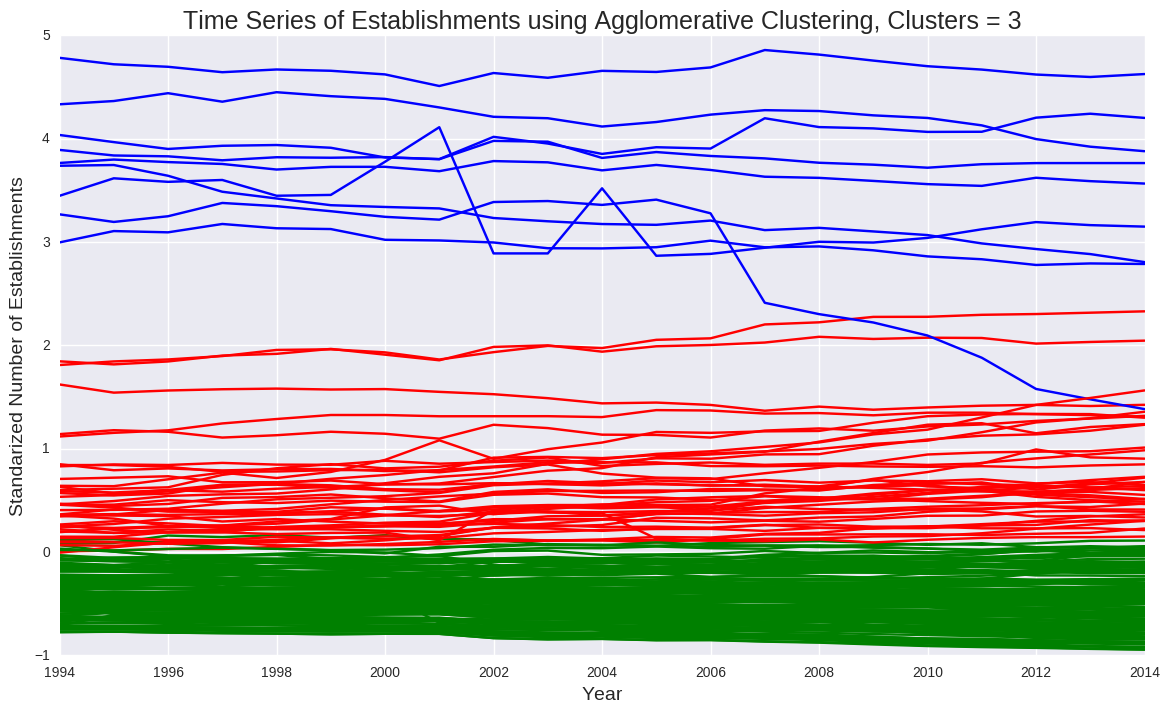

In [23]:
# Cluster Visualization
fig = plt.figure(1, figsize=(14, 8))
colors = ['red', 'blue', 'green']
val = [int(j) for j in cb_data_stan.columns[0:-2]]

for i in range(len(cb_data_stan)):
    plt.plot(val, cb_data_stan.iloc[i,:-2], c=colors[cb_data_stan.agg_label.iloc[i]], label='_zipcode time series')  

plt.ylabel('Standarized Number of Establishments', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks((np.arange(1994,2015,2)))
plt.xlim(1994,2014)
plt.title("Time Series of Establishments using Agglomerative Clustering, Clusters = {}".format(n), fontsize=18)
plt.legend(fontsize=12)

#### Figure 4:
Figure 4 illustrates the time series for each of the 3 clusters. Each time series represents a zip code in New York. The plot shows three seperate clusters of zip codes based on the number of establishments. Cluster 1 is approximately 3 standard deviations from the mean for each year which would indicate zip codes with large retail districts.

### Task 5
--------------
* Download zipcode shapefile
* Import zipcode shapefile into geopandas dataframe
* Merge Cluster labels into zipcode dataframe
* Plot map with cluster labels as colors of zip codes

In [24]:
# Download zipcode shapefile
os.system('curl -o ' + os.getenv('PUIDATA') + '/nyc_zipcodes.geojson' + \
              ' http://data.beta.nyc//dataset/3bf5fb73-edb5-4b05-bb29-7c95f4a727fc/' + \
              'resource/6df127b1-6d04-4bb7-b983-07402a2c3f90/download/f4129d9aa6dd4281bc' + \
              '98d0f701629b76nyczipcodetabulationareas.geojson')

0

In [25]:
# Import zipcodes into geopandas dataframe
nyc_zip = gpd.read_file(os.getenv('PUIDATA') + '/nyc_zipcodes.geojson')
nyc_zip.head()

,@id,BLDGpostal,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,borough,geometry,latitude,longitude,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,Queens,POLYGON ((-73.86942457284177 40.74915687096788...,40.751662,-73.883573,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,Queens,POLYGON ((-73.71132911125308 40.74947450816085...,40.745366,-73.711608,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,40.748714,-73.703443,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,40.736534,-73.724004,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,Queens,"POLYGON ((-73.81088634744756 40.7271718757592,...",40.739903,-73.794626,11365


In [28]:
nyc_zip.shape

(262, 12)

In [26]:
# Merge cluster labels into nyc_zip
cluster_labels = cb_data_stan[['km_label', 'agg_label']]
nyc_zip['postalCode'] = nyc_zip['postalCode'].astype(int)
nyc_zip_clusters = nyc_zip.merge(cluster_labels, left_on='postalCode', right_index=True)
nyc_zip_clusters.head()

,@id,BLDGpostal,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,borough,geometry,latitude,longitude,postalCode,km_label,agg_label
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,Queens,POLYGON ((-73.86942457284177 40.74915687096788...,40.751662,-73.883573,11372,2,0
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,Queens,POLYGON ((-73.71132911125308 40.74947450816085...,40.745366,-73.711608,11004,0,2
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,40.748714,-73.703443,11040,2,0
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,40.736534,-73.724004,11426,0,2
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,Queens,"POLYGON ((-73.81088634744756 40.7271718757592,...",40.739903,-73.794626,11365,0,2


In [27]:
nyc_zip_clusters.shape

(187, 14)

/Users/Danny1/anaconda/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


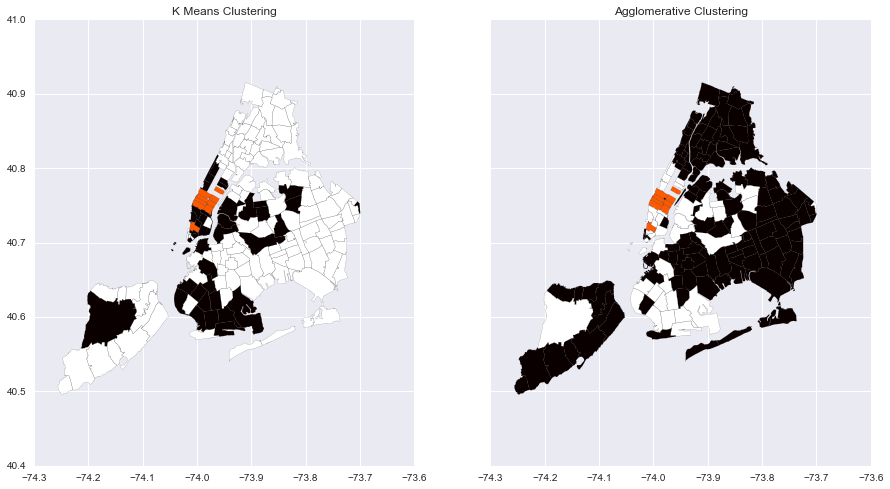

In [21]:
# Visualize cluster labels on nyc map for both types of clustering
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,8))

nyc_zip_clusters.plot(column='km_label',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax1)
ax1.set_title("K Means Clustering")
nyc_zip_clusters.plot(column='agg_label',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax2)
ax2.set_title("Agglomerative Clustering")

#### Figure 5 & 6:
The above plots show the difference each zip code colored by their label from K means clustering and Agglomerative clustering. Both K means and Agglomerative clustered the data identically.

### Task 7
--------------
* Interpret Results

#### Interpretation:
I would argue the areas colored as orange are large commercial areas which also have heavy pedestrian traffic. Furthermore, the areas in white for K means and black for Agglomerative (which are identical) are largely residential with fewer retail shops. There also seems to be a potential spatial pattern of as you move further away from the downtown Manhattan the number of establishments decreases.